In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
pd.set_option('max_columns', None) # set pandas to display all columns

# Import the data
df = pd.read_csv("./data/survey_results_public.csv")
print("There are {} columns and {} rows in the data.".format(df.shape[1], df.shape[0]))

There are 85 columns and 88883 rows in the data.


In [2]:
# Limit the dataset to only those in the United States
df_usa = df[df["Country"]=="United States"]
df_usa.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
12,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,3-4 years ago,Complete a take-home project;Interview with pe...,Yes,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,90000.0,Yearly,90000.0,40.0,There is a schedule and/or spec (made by me or...,"Meetings;Non-work commitments (parenting, scho...",All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",5.0,"No, but I think we should",Developers and management have nearly equal in...,I have a great deal of influence,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Express;Vue.js,Node.js;Xamarin,Node.js;TensorFlow,Vi

In [4]:
# In order to account for this error, drop all rows where 
# Total Compensation [CompTotal] != Converted Compensation [ConveretedComp]
df = df_usa[["Employment", "EdLevel", "EduOther", "OrgSize", "DevType", "YearsCode", "YearsCodePro", "Age1stCode", "YearsCodePro", "CareerSat", "JobSat", "MgrIdiot", "MgrMoney","MgrWant"]]
#df = df[df["ConvertedComp"]==df["CompTotal"]]
df.describe()

,Employment,EdLevel,EduOther,OrgSize,DevType,YearsCode,YearsCodePro,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant
count,20663,20605,20461,17608,19402,20790,18359,20735,18359,17998,17595,15334,15346,15360
unique,6,9,388,9,4535,52,52,59,52,5,5,4,3,4
top,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Taught yourself a new language, framework, or ...","10,000 or more employees","Developer, full-stack",10,3,12,3,Very satisfied,Very satisfied,Very confident,No,Not sure
freq,16771,10953,1365,3961,2482,1444,1636,2183,1636,9376,7197,7456,8680,5858


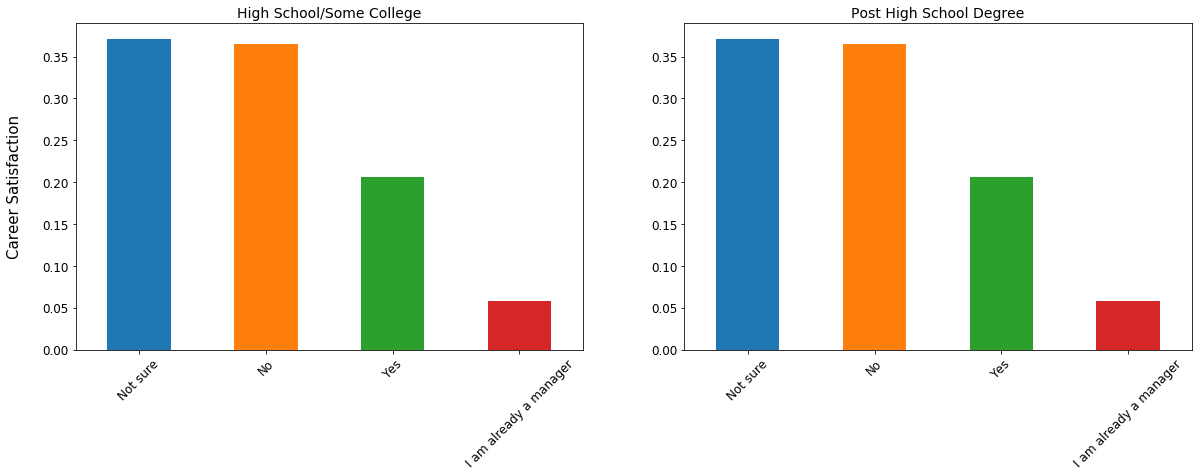

In [17]:
HighSchool = df[df.EdLevel.isin(['Some college/university study without earning a degree', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'])]
PostHighchool = df[df["EdLevel"].isin(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
        'Professional degree (JD, MD, etc.)'])]
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
HighSchool['MgrWant'].value_counts(normalize=True).plot(kind="bar", ax=axes[0], rot=45, label="High School");
HighSchool['MgrWant'].value_counts(normalize=True).plot(kind="bar", ax=axes[1], rot=45, label="Post High School");

axes[0].set_ylabel('Career Satisfaction', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

axes[0].set_title('High School/Some College', fontsize=14)
axes[1].set_title('Post High School Degree', fontsize=14);

In [18]:
# We observe a similar distribution among those with high school degrees and those with advanced degrees. 
# Might be worth doing, looking at what what factors are common among those who desire to become Managers.